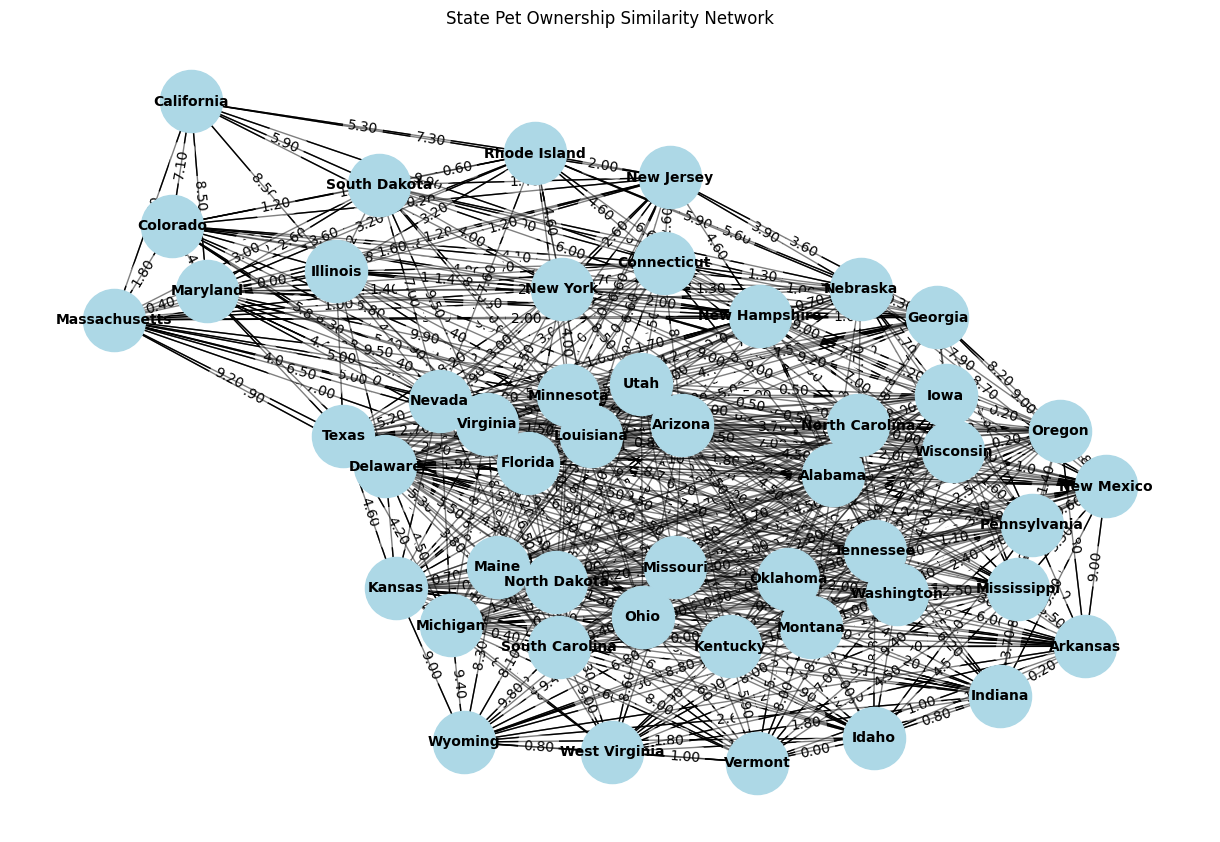

In [4]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'pet_ownership.csv'
df = pd.read_csv(file_path)

# Calculate Euclidean difference matrix for PetOwnershipRate
dist_matrix = pdist(df[['PetOwnershipRate']], metric='euclidean')
dist_matrix = squareform(dist_matrix)

# Create a threshold for connecting states
# We can adjust the threshold for better visualization...
threshold = 10  

# Create a graph
G = nx.Graph()

# Add nodes
for state in df['State']:
    G.add_node(state)

# Add edges based on threshold distance
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        if dist_matrix[i, j] < threshold:
            G.add_edge(df['State'][i], df['State'][j], weight=dist_matrix[i, j])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
edges = G.edges(data=True)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

plt.title('State Pet Ownership Similarity Network')
plt.show()
